<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Likelihood-definition:-the-theoretical-probability-of-having-gotten-the-observed-outcomes." data-toc-modified-id="Likelihood-definition:-the-theoretical-probability-of-having-gotten-the-observed-outcomes.-0.0.1"><span class="toc-item-num">0.0.1&nbsp;&nbsp;</span>Likelihood definition: the theoretical probability of having gotten the observed outcomes.</a></span></li><li><span><a href="#Objective:-$\hat{\theta}_{MLE}-=-\underset{\theta}{\mathrm{argmin}}&#10;\-L(\theta;-x_1,x_2,....,x_n)$" data-toc-modified-id="Objective:-$\hat{\theta}_{MLE}-=-\underset{\theta}{\mathrm{argmin}}
\-L(\theta;-x_1,x_2,....,x_n)$-0.0.2"><span class="toc-item-num">0.0.2&nbsp;&nbsp;</span>Objective: $\hat{\theta}_{MLE} = \underset{\theta}{\mathrm{argmin}}
\ L(\theta; x_1,x_2,....,x_n)$</a></span></li><li><span><a href="#(conditional)-Likelihood-function-to-maximize" data-toc-modified-id="(conditional)-Likelihood-function-to-maximize-0.0.3"><span class="toc-item-num">0.0.3&nbsp;&nbsp;</span>(conditional) Likelihood function to maximize</a></span></li><li><span><a href="#Link-function:" data-toc-modified-id="Link-function:-0.0.4"><span class="toc-item-num">0.0.4&nbsp;&nbsp;</span>Link function:</a></span></li><li><span><a href="#Log-(conditional)-likelihood-function-to-maximize" data-toc-modified-id="Log-(conditional)-likelihood-function-to-maximize-0.0.5"><span class="toc-item-num">0.0.5&nbsp;&nbsp;</span>Log (conditional) likelihood function to maximize</a></span></li><li><span><a href="#There-is-another-common-way-that-the-LCL-is-written-as-well." data-toc-modified-id="There-is-another-common-way-that-the-LCL-is-written-as-well.-0.0.6"><span class="toc-item-num">0.0.6&nbsp;&nbsp;</span>There is another common way that the LCL is written as well.</a></span></li><li><span><a href="#Partial-derivative-of-log-conditional-likelihood-to-get-update-rule:" data-toc-modified-id="Partial-derivative-of-log-conditional-likelihood-to-get-update-rule:-0.0.7"><span class="toc-item-num">0.0.7&nbsp;&nbsp;</span>Partial derivative of log conditional likelihood to get update rule:</a></span></li><li><span><a href="#Update-rule:-$$-\beta_j-=-\beta_j-+-\alpha-\sum_{i=1}^{N}-(y_i---h_{\theta}(x_i))x_{ij}$$" data-toc-modified-id="Update-rule:-$$-\beta_j-=-\beta_j-+-\alpha-\sum_{i=1}^{N}-(y_i---h_{\theta}(x_i))x_{ij}$$-0.0.8"><span class="toc-item-num">0.0.8&nbsp;&nbsp;</span>Update rule: <script type="math/tex; mode=display" id="MathJax-Element-593"> \beta_j = \beta_j + \alpha \sum_{i=1}^{N} (y_i - h_{\theta}(x_i))x_{ij}</script></a></span></li><li><span><a href="#This-is-very-important!-Always-start-with-a-$\-\alpha-\leq-.00001$.-The-thought-goes-to-make-sure-that-you-have-converging-behavior-before-finding-a-more-optimal-alpha" data-toc-modified-id="This-is-very-important!-Always-start-with-a-$\-\alpha-\leq-.00001$.-The-thought-goes-to-make-sure-that-you-have-converging-behavior-before-finding-a-more-optimal-alpha-0.0.9"><span class="toc-item-num">0.0.9&nbsp;&nbsp;</span>This is very important! Always start with a $\ \alpha \leq .00001$. The thought goes to make sure that you have converging behavior before finding a more optimal alpha</a></span></li></ul></li></ul></li></ul></div>

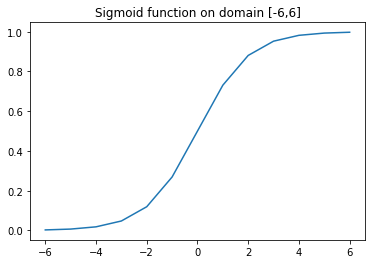

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('coronary_heart_disease.csv')

def s(x):
    return 1 / (1 + np.exp(- x))

domain = [-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6]
plt.plot(domain, [s(a) for a in domain])
plt.title('Sigmoid function on domain [-6,6]')
plt.show()

In [2]:
data.head()

,Age,CHD
0,20,0
1,23,0
2,24,0
3,25,1
4,25,0


In [3]:
data = pd.read_csv('coronary_heart_disease.csv')
X = data['Age']
y = data['CHD']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, 
                                                    random_state=42)

### Likelihood definition: the theoretical probability of having gotten the observed outcomes.

So in maximizing likelihood over all choices of theta, you can imagine that we are trying to recreate in our model the probability distribution (which would be Bernoulli in this case) from which the data is realized (because I believe that this would actually maximize the probability of having gotten the data we observed)

### Objective: $\hat{\theta}_{MLE} = \underset{\theta}{\mathrm{argmin}}
\ L(\theta; x_1,x_2,....,x_n)$

### (conditional) Likelihood function to maximize
$$ L(\theta; x_1, x_2,...,x_n) = \prod_{i=1}^{N} p_{i}^{y_i}(1 - p_i)^{1 - y_i},$$
<br>
where $p_i = p(Y = 1 \mid x_i; \theta) = \sigma(\sum_{j=1}^{M} \theta_jx_{ij}) = \dfrac{1}{1 + \mathrm{e}^{-(\sum_{j=1}^{M} \theta_jx_{ij})}}$
###### Note that the $\theta_0$ value is assumed to be included in the vector and $x_0 = 1$
###### Note also that the "where" line is an assumption; we are assuming that the probability that Y = 1 is a nonlinear function (sigmoid function) of a linear function of x.

### Link function: 
This function, $g$, takes the mean response and returns back the linear combination of predictors and theta. $g$ is the inverse of the sigmoid function. Therefore, $g^{-1}(z)$ will be your prediction (i.e. $p(Y = 1 \mid X; \theta)$), where $z$ is the linear combination of theta and your predictors. This is how logistic regression fits into generalized linear models. Note that for generalized linear models use only exponential family distributions to model the response variable. 

The below equation gives the log odds for a single training example (x value)

$$\log\dfrac{p}{1-p} = \sum_{j=1}^{M} \theta_jx_j$$

### Log (conditional) likelihood function to maximize

This can be done because log is a monotonic function (always increasing => x1 > x2 => log(x1) > log(x2)). This means that the same theta that maximizes the log likelihood also maximizes the likelihood. This also makes the likelihood much easier to differentiate. 

$$
LCL = \sum_{i=1}^{N}\log L(\theta; y_i \mid x_i) 
    = \sum_{i:y_i=1} \log p_i + \sum_{i:y_i=0} \log (1 - p_i) 
    = \sum_{i=1}^{N} y_i\log p_i + (1-y_i)\log(1 - p_i) 
$$

### There is another common way that the LCL is written as well.

$$ \text{Let} \ z = \sum_{j=1}^{M} \theta_jx_{ij} $$
$$LLC = \sum_{i=1}^{N} y_i\log p_i + (1-y_i)\log(1 - p_i) $$
$$\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ = \sum_{i=1}^{N} y_i\log \dfrac{\mathrm{e}^z}{1+\mathrm{e}^z} + (1-y_i)\log(1 - \dfrac{\mathrm{e}^z}{1+\mathrm{e}^z}) $$
$$\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ = \sum_{i=1}^{N} y_i\log \dfrac{\mathrm{e}^z}{1+\mathrm{e}^z} + (1-y_i)\log(\dfrac{1}{1+\mathrm{e}^z}) $$
$$\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \  \ \ \ \ \ \ \ \ \ = \sum_{i=1}^{N} y_{i}z - y_i\log(1+\mathrm{e}^z) - (1-y_i)\log(1+\mathrm{e}^z) $$
$$\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \  \ \ \ \ \ \ \ \ \ \ \ \ \ = \sum_{i=1}^{N} y_{i}z - y_i\log(1+\mathrm{e}^z) - \log(1+\mathrm{e}^z) + y_i\log(1+\mathrm{e}^z) $$
$$ = \sum_{i=1}^{N} y_{i}z - \log(1+\mathrm{e}^z) $$

In [4]:
fixed_X_train = np.insert(X_train.values.reshape(-1,1), 0, 1, axis=1)
fixed_y_train = np.array(y_train)

In [82]:
def likelihood(theta, X_train, y_train):
    # eps is to prevent log(0) 
    eps = .000000000000000000000000000000000001
    s = 0.0
    for i in range(len(X_train)):
        p = sigmoid_hypothesis(theta, X_train[i, :])
        y_is_one = y_train[i]*np.log(p+eps)
        y_is_zero = (1-y_train[i])*np.log(1-p+eps)
        s += y_is_one + y_is_zero
    return s

def sigmoid_hypothesis(theta, x):
    return 1 / (1 + np.exp(-np.dot(theta, x)))

def compare_with_sklearn_lgr(theta, X_train, y_train):
    from sklearn.linear_model import LogisticRegression
    clf = LogisticRegression(fit_intercept=True)
    clf.fit(X_train, y_train)

    sklearn_theta = clf.coef_.flatten()
    print('sklearn theta', sklearn_theta, 'sklearn likelihood', likelihood(sklearn_theta, 
                                                                           X_train,
                                                                           y_train))
    print('scratch theta', theta, 'scratch likelihood', likelihood(theta,
                                                                   X_train,
                                                                   y_train))

### Partial derivative of log conditional likelihood to get update rule:
$$ \frac{\partial}{\partial \theta_i}LLC = \frac{\partial }{\partial \theta_i}\sum_{i=1}^{N} y_{i}z - \log(1+\mathrm{e}^z) $$
$$ = \sum_{i=1}^{N} y_{i}x_{ij} - \dfrac{1}{1+\mathrm{e}^z}\frac{\partial}{\partial \theta_i}1+e^z $$
$$ = \sum_{i=1}^{N} y_{i}x_{ij} - \dfrac{e^{z}x_{ij}}{1+\mathrm{e}^z} $$
$$ = \sum_{i=1}^{N} (y_{i} - h_{\theta}(x_i))x_{ij} $$
, where $h_{\theta}(x_i) = \dfrac{1}{1+\mathrm{e}^{-\sum_{j=1}^{M} \theta_jx_{ij}}}$

### Update rule: $$ \beta_j = \beta_j + \alpha \sum_{i=1}^{N} (y_i - h_{\theta}(x_i))x_{ij}$$

### This is very important! Always start with a $\ \alpha \leq .00001$. The thought goes to make sure that you have converging behavior before finding a more optimal alpha

In [133]:
def gd_element_wise(theta, X_train, y_train, alpha=.00001):
    errors = np.zeros([len(y_train)])
    for m in range(len(y_train)):
            errors[m] = \
            sigmoid_hypothesis(theta, 
                               X_train[m, :]) - y_train[m]
    for j in range(len(theta)):
        # This is the sum next to alpha 
        gradient_j = 0.0
        for m in range(len(y_train)):
            gradient_j += errors[m] * X_train[m, j]
        # Note that we subtract here because gradient has a negative value
        # so we go in opposite direction to maximze ???
        theta[j] = theta[j] - alpha * gradient_j

def pretrain(X_train, y_train, add_intercept=True):
    if y_train.ndim != 1: 
        raise Exception('y_train should be 1D')
    y_train = np.array(y_train)
    if X_train.ndim == 1: 
        X_train = np.array([np.array([x]) for x in X_train])
    # Add intercept for x_0 = 1 
    if add_intercept:
        # insert syntax: arr, index, value, dimension to insert
        # it will insert for each array in the given dimension
        # i.e. it is broadcasted 
        X_train = np.insert(X_train, 0, 1, axis=1)
        
    return [X_train, y_train]
        
def train_element_wise(X_train, y_train, max_iter, alpha=.00001, 
                      add_intercept=True, showConverge=False):
    X_train, y_train = pretrain(X_train, y_train, add_intercept)
        
    # length of theta should be === # features 
    theta = np.zeros(X_train.shape[1])
    for i in range(max_iter):
        gd_element_wise(theta, X_train, y_train, alpha)
        if showConverge:
            print('likelihood', likelihood(theta, X_train, y_train))
    return theta

theta = train_element_wise(X_train, y_train, 1000, .00003, showConverge=False)
compare_with_sklearn_lgr(theta, fixed_X_train, fixed_y_train)

sklearn theta [-1.64784075  0.06906915] sklearn likelihood -57.7476896657
scratch theta [-0.14083378  0.00329964] scratch likelihood -45.7770069369


In [126]:
# some vectorization for better performance
def h_vec(theta, X):
    # -X @ theta is matrix multipy
    return 1 / (1 + np.exp(-X @ theta))

def gd_better(theta,  X_train, y_train, alpha=.00001):
    # Predictions for all examples
    predictions = h_vec(theta, X_train)
    errors = predictions - y_train
    for j in range(len(theta)):
        # Note that we subtract here because gradient has a negative value
        # so we go in opposite direction to maximze ???
        theta[j] = theta[j] - alpha * np.dot(errors, X_train[:, j])
        
def train_better(X_train, y_train, max_iter, alpha=.00001, add_intercept=True, showConverge=False):
    X_train, y_train = pretrain(X_train, y_train, add_intercept)
    theta = np.zeros(X_train.shape[1])
    for i in range(max_iter):
        gd_better(theta, X_train, y_train, alpha) 
        if showConverge:
            print('likelihood', likelihood(theta, X_train, y_train))
    return theta

theta = train_better(X_train, y_train, 1000, .00003, showConverge=False)
compare_with_sklearn_lgr(theta, fixed_X_train, fixed_y_train)

sklearn theta [-1.64784075  0.06906915] sklearn likelihood -57.7476896657
scratch theta [-0.14083378  0.00329964] scratch likelihood -45.7770069369


In [123]:
# fully vectorized - Adapted from http://cs229.stanford.edu/section/vec_demo/lr.ipynb
def gd (theta, X_train, y_train, alpha=.00001):
    predictions = h_vec(theta, X_train)
    errors = predictions - y_train
    # Note that we subtract here because gradient has a negative value
    # so we go in opposite direction to maximze ???
    theta -= alpha * errors @ X_train
    
def train_vec(X_train, y_train, max_iter, alpha=.00001, add_intercept=True, showConverge=False):
    X_train, y_train = pretrain(X_train, y_train, add_intercept)
    theta = np.zeros(X_train.shape[1])
    for i in range(max_iter):
        gd(theta, X_train, y_train, alpha)  
        if i % 10000 == 0:
            print('likelihood', likelihood(theta, X_train, y_train))
    return theta

theta = train_vec(X_train, y_train, 1000, .00003, showConverge=False)
compare_with_sklearn_lgr(theta, fixed_X_train, fixed_y_train)

likelihood -46.43788095
sklearn theta [-1.64784075  0.06906915] sklearn likelihood -57.7476896657
scratch theta [-0.14083378  0.00329964] scratch likelihood -45.7770069369
